In [1]:
import pathlib
import re
import sys

In [2]:
import matplotlib.pyplot
import numpy
import pandas

In [3]:
BASE_PATH = pathlib.Path('..')

In [4]:
CODE_PATH = BASE_PATH
sys.path.insert(0, str(CODE_PATH.resolve()))

In [5]:
import iis_project.pandas_utils
import iis_project.plotting_utils

In [6]:
DATA_PATH = BASE_PATH / 'data'

In [7]:
df_orig = pandas.read_csv(DATA_PATH / 'cars.csv')
df_orig = df_orig.rename(columns=lambda s: re.sub(r'\s', '_', s.lower().replace(' ', '_')))

In [8]:
df_orig.head(0x10)

car_name  year  selling_price  present_price  driven_kms fuel_type  \
0            ritz  2014           3.35           5.59       27000    Petrol   
1             sx4  2013           4.75           9.54       43000    Diesel   
2            ciaz  2017           7.25           9.85        6900    Petrol   
3         wagon r  2011           2.85           4.15        5200    Petrol   
4           swift  2014           4.60           6.87       42450    Diesel   
5   vitara brezza  2018           9.25           9.83        2071    Diesel   
6            ciaz  2015           6.75           8.12       18796    Petrol   
7         s cross  2015           6.50           8.61       33429    Diesel   
8            ciaz  2016           8.75           8.89       20273    Diesel   
9            ciaz  2015           7.45           8.92       42367    Diesel   
10       alto 800  2017           2.85           3.60        2135    Petrol   
11           ciaz  2015           6.85          10.38       51000    Diesel   
12           ciaz  2015           7.50           9.94       15000    Petrol   
13         ertiga  2015           6.10           7.71       26000    Petrol   
14          dzire  2009           2.25           7.21       77427    Petrol   
15         ertiga  2016           7.75          10.79       43000    Diesel   

   selling_type transmission  owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
5        Dealer       Manual      0  
6        Dealer       Manual      0  
7        Dealer       Manual      0  
8        Dealer       Manual      0  
9        Dealer       Manual      0  
10       Dealer       Manual      0  
11       Dealer       Manual      0  
12       Dealer    Automatic      0  
13       Dealer       Manual      0  
14       Dealer       Manual      0  
15       Dealer       Manual      0

In [9]:
len(df_orig)

301

In [10]:
iis_project.pandas_utils.describe_df(df_orig)

length    dtype
car_name          301   object
year              301    int64
selling_price     301  float64
present_price     301  float64
driven_kms        301    int64
fuel_type         301   object
selling_type      301   object
transmission      301   object
owner             301    int64

In [11]:
numeric_columns_orig = ('selling_price', 'present_price', 'driven_kms')
categorical_columns_orig = ('car_name', 'fuel_type', 'selling_type', 'transmission', 'owner')

In [12]:
df_orig[list(numeric_columns_orig)].describe()

selling_price  present_price     driven_kms
count     301.000000     301.000000     301.000000
mean        4.661296       7.628472   36947.205980
std         5.082812       8.642584   38886.883882
min         0.100000       0.320000     500.000000
25%         0.900000       1.200000   15000.000000
50%         3.600000       6.400000   32000.000000
75%         6.000000       9.900000   48767.000000
max        35.000000      92.600000  500000.000000

In [13]:
all((len(s) == len(df_orig)) for _, s in df_orig.items())

True

In [14]:
categorical_values_for_columns_orig = {
    column: series.unique()
    for column, series in df_orig[list(categorical_columns_orig)].items()
}

for column, values in categorical_values_for_columns_orig.items():
    if len(values) <= 0x10:
        values_str = ', '.join(map(repr, values))
    else:
        values_str = f'({len(values)} values)'
    print(f'{column!r}: {values_str}')

'car_name': (98 values)
'fuel_type': 'Petrol', 'Diesel', 'CNG'
'selling_type': 'Dealer', 'Individual'
'transmission': 'Manual', 'Automatic'
'owner': np.int64(0), np.int64(1), np.int64(3)


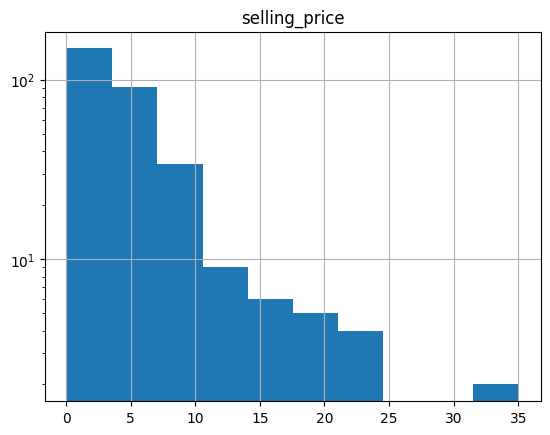

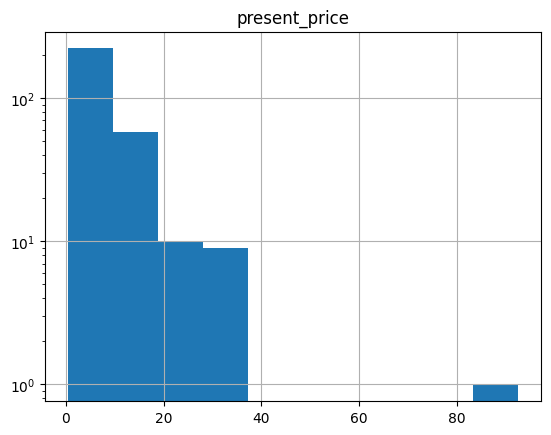

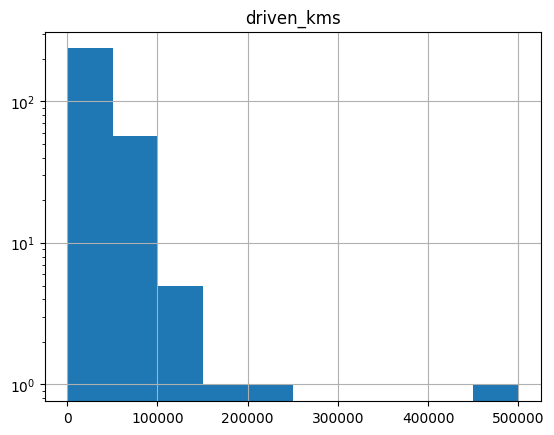

In [15]:
for column, series in df_orig[list(numeric_columns_orig)].items():
    _fig, _ax = matplotlib.pyplot.subplots()
    _ax.set_title(str(column))
    #_ax.set_xscale('symlog')
    _ax.set_yscale('log')
    _ax.grid(True)
    _ = _ax.hist(series, bins=iis_project.plotting_utils.suggest_bins_num(len(series)))

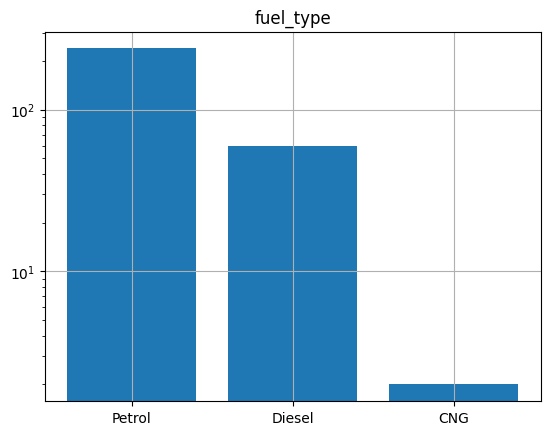

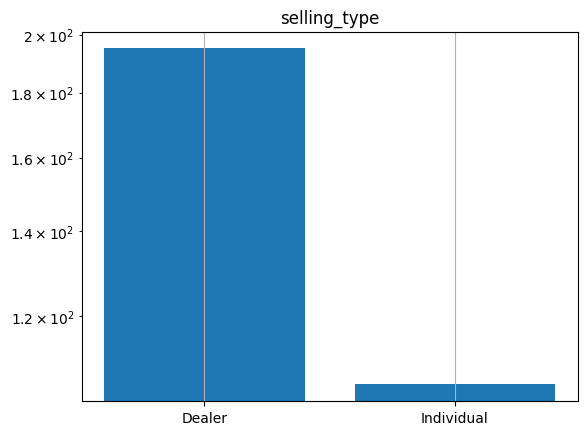

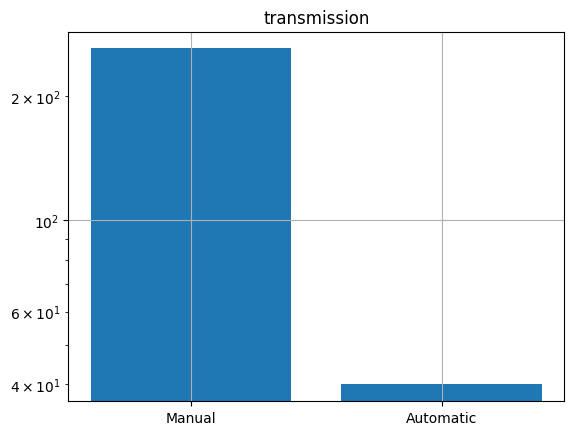

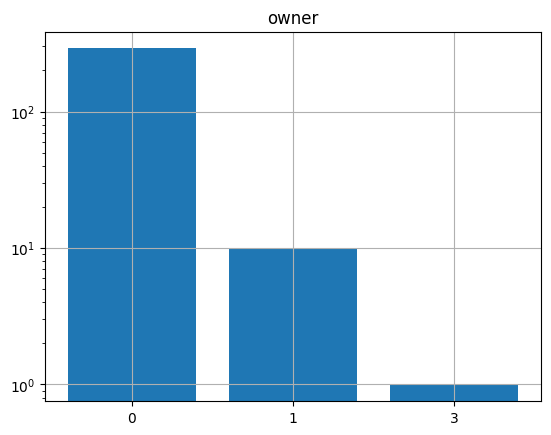

In [16]:
for column, series in df_orig[list(filter(lambda s: s not in ('car_name',), categorical_columns_orig))].items():
    _fig, _ax = matplotlib.pyplot.subplots()
    _ax.set_title(str(column))
    _ax.set_yscale('log')
    _ax.grid(True)
    value_counts = series.value_counts()
    _ = _ax.bar(tuple(map(str, value_counts.index)), value_counts)

In [17]:
labels_to_drop_from_orig = []

In [18]:
df_orig.loc[df_orig['owner'].isin((3,))]

car_name  year  selling_price  present_price  driven_kms fuel_type  \
85    camry  2006            2.5          23.73      142000    Petrol   

   selling_type transmission  owner  
85   Individual    Automatic      3

In [19]:
labels_to_drop_from_orig.extend(df_orig.loc[df_orig['owner'].isin((3,))].index)

In [20]:
df_orig.loc[(df_orig['present_price'] >= 60.) | (df_orig['driven_kms'] >= 400000) | (df_orig['fuel_type'].isin(('CNG',)))]

car_name  year  selling_price  present_price  driven_kms fuel_type  \
18        wagon r  2015           3.25           5.09       35500       CNG   
35            sx4  2011           2.95           7.74       49998       CNG   
86   land cruiser  2010          35.00          92.60       78000    Diesel   
196     Activa 3g  2008           0.17           0.52      500000    Petrol   

    selling_type transmission  owner  
18        Dealer       Manual      0  
35        Dealer       Manual      0  
86        Dealer       Manual      0  
196   Individual    Automatic      0

In [21]:
labels_to_drop_from_orig.extend((196,))

In [22]:
df = df_orig.drop(labels_to_drop_from_orig)

In [23]:
len(df)

299

In [24]:
iis_project.pandas_utils.describe_df(df)

length    dtype
car_name          299   object
year              299    int64
selling_price     299  float64
present_price     299  float64
driven_kms        299    int64
fuel_type         299   object
selling_type      299   object
transmission      299   object
owner             299    int64

In [25]:
df[list(numeric_columns_orig)].describe()

selling_price  present_price     driven_kms
count     299.000000     299.000000     299.000000
mean        4.683545       7.598395   35047.187291
std         5.091611       8.611335   27607.236346
min         0.100000       0.320000     500.000000
25%         0.900000       1.230000   15000.000000
50%         3.650000       6.400000   32000.000000
75%         6.000000       9.875000   47500.000000
max        35.000000      92.600000  213000.000000

In [26]:
categorical_values_for_columns = {
    column: series.unique()
    for column, series in df[list(categorical_columns_orig)].items()
}

for column, values in categorical_values_for_columns.items():
    if len(values) <= 0x10:
        values_str = ', '.join(map(repr, values))
    else:
        values_str = f'({len(values)} values)'
    print(f'{column!r}: {values_str}')

'car_name': (97 values)
'fuel_type': 'Petrol', 'Diesel', 'CNG'
'selling_type': 'Dealer', 'Individual'
'transmission': 'Manual', 'Automatic'
'owner': np.int64(0), np.int64(1)


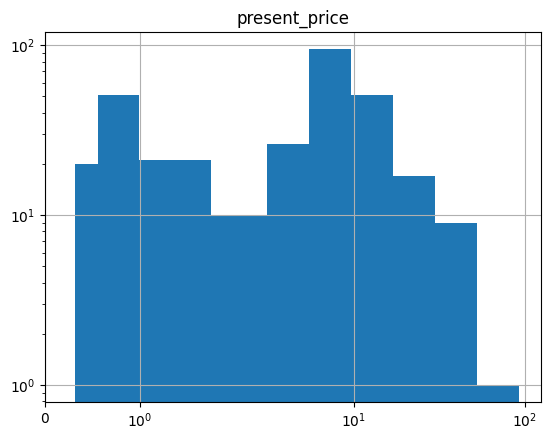

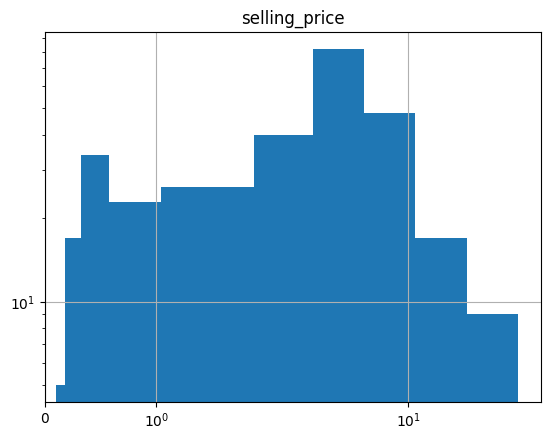

In [29]:
for column, series in df_orig[['present_price', 'selling_price']].items():
    _fig, _ax = matplotlib.pyplot.subplots()
    _ax.set_title(str(column))
    _ax.set_xscale('symlog')
    _ax.set_yscale('log')
    _ax.grid(True)
    _ = _ax.hist(series, bins=numpy.logspace(
        numpy.log10(min(series)), numpy.log10(max(series)), (iis_project.plotting_utils.suggest_bins_num(len(series)) + 1), endpoint=True, base=10),
    )
    _ = _ax.set_xlim((0, None))

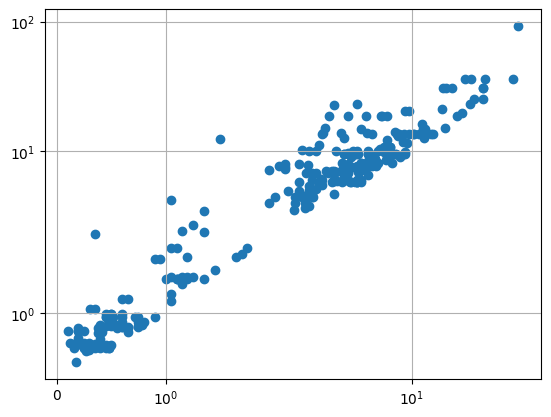

In [32]:
_fig, _ax = matplotlib.pyplot.subplots()
_ax.set_xscale('symlog')
_ax.set_yscale('symlog')
_ax.grid(True)
_ = _ax.scatter(df['selling_price'], df['present_price'])